# ***STOCK PRICE PREDICTION OF MICROSOFT CORP.***

---


# **Importing the libraries :-**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
%matplotlib inline
from keras.models import sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import os

# **Loading Dataset :-** 

In [ ]:
df = pd.read_csv('Microsoft_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


# **Visualizing Data :-**

Text(0.5, 1.0, 'Microsoft Corp. Stock Price Prediction')

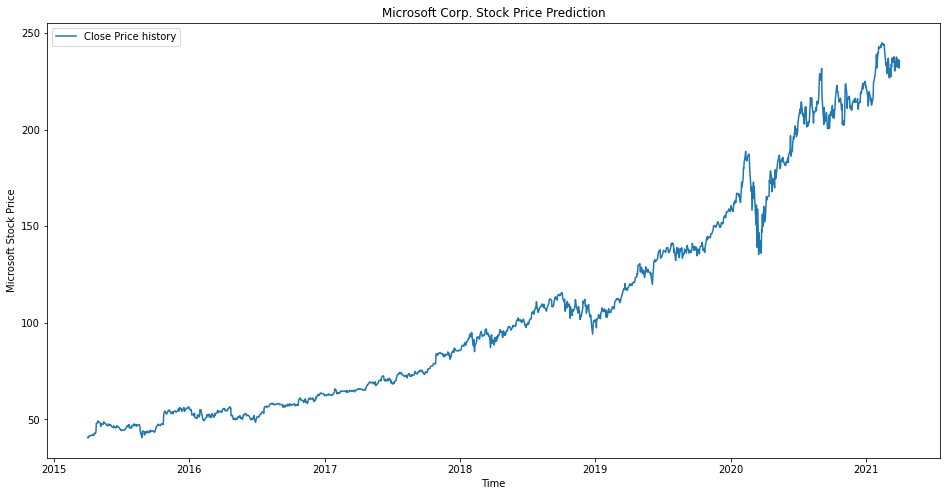

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.title('Microsoft Corp. Stock Price Prediction')



# **Data Preprocessing :-**

In [ ]:
print("Dataframe Shape:" , df.shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape: (1511, 6)
Null Value Present:  False


In [ ]:
training_set = df.iloc[:,1:2].values
print(training_set)
print(training_set.shape)



[[ 40.6 ]
 [ 40.66]
 [ 40.34]
 ...
 [236.59]
 [233.53]
 [232.91]]
(1511, 1)


In [ ]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.00127021],
       [0.00156334],
       [0.        ],
       ...,
       [0.95876692],
       [0.94381748],
       [0.94078851]])

In [ ]:
x_train,y_train = [],[]
for i in range(60,len(train)):
   x_train.append(scaled_training_set[i-60:i,0])
   y_train.append(scaled_training_set[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(927, 60)
(927,)


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(927, 60, 1)

# **Building the LSTM Model :-**

In [ ]:
from keras.models import Sequential

regressor = Sequential()


regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(LSTM(units=50))
regressor.add(Dense(1))

inputs=new_data[len(new_data)-len(valid)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)





In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 1, batch_size = 1, verbose = 2)


927/927 - 25s - loss: 3.0749e-04 - 25s/epoch - 27ms/step


In [ ]:


x_test = []
for i in range(60,inputs.shape[0]): 
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
closing_price = regressor.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms



Close          23.071307
Predictions     0.000000
dtype: float64

# **Plotting the results :-**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


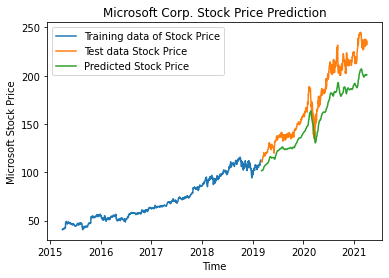

In [ ]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price

plt.plot(train["Close"],label = "Training data of Stock Price")
plt.plot(valid["Close"],label = "Test data Stock Price")
plt.plot(valid['Predictions'],label = "Predicted Stock Price")
plt.title('Microsoft Corp. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

Close          23.071307
Predictions     0.000000
dtype: float64